In [2]:
def mod(x, m):
    """Return the result of x mod m"""
    
    # STEP 1: Check if x is too large to be in the range, and decrease it accordingly
    # HINT: Consider the idea of 'repeated subtraction'!
    
    while (x > m - 1): # HKN: this should be removed
        x -= m
    
    # STEP 2: Check if x is too small to be in the range, and increase it accordingly
    
    while (x < 0): # HKN: this should be removed
        x += m
    
    return x # TODO: change this line to return the right result
    # HKN: above line should be 'return 0'

def mod_test():
    """Sanity tests to check your implementation"""
    tests = [(5, 3), (10, 5), (9, 9), (-1, 4), (-3, 3)]
    for x, m in tests:
        expected = x % m
        actual = mod(x, m)
        if expected == actual:
            print("PASS: %d mod %d = %d" % (x, m, actual))
        else:
            print("FAIL: Expected %d mod %d = %d, but your function returned %d" % (x, m, expected, actual))
mod_test()    

PASS: 5 mod 3 = 2
PASS: 10 mod 5 = 0
PASS: 9 mod 9 = 0
PASS: -1 mod 4 = 3
PASS: -3 mod 3 = 0


In [10]:
# The below code is provided to you as a black box - you don't have to understand how it works.
# (Feel free to read through the code if you're interested!)

def inverse(x, m):
    d, a, b = ext_euclid(m, x)
    if d == 1:
        return b
    else:
        raise ArithmeticError("No inverse for %d mod %d exists" % (x, m))

def ext_euclid(x, y):
    if y == 0:
        return (x, 1, 0)
    d, a, b = ext_euclid(y, mod(x, y)) # Check it out - your mod function in action!
    return (d, b, a - (x // y) * b)

def inverse_tests():
    tests = [(12, 35, 3), (10, 16, None)]
    for x, m, expected in tests:
        if expected == None:
            try:
                actual = inverse(x, m)
            except ArithmeticError:
                print("PASS: No inverse exists for %d mod %d" % (x, m))
            else:
                print("FAIL: Expected no inverse for %d mod %d, but your function returned %d" % (x, m, actual))
        else:
            try:
                actual = inverse(x, m)
                if expected == actual:
                    print("PASS: %d ^(-1) mod %d = %d" % (x, m, actual))
                else:
                    print("FAIL: Expected %d ^(-1) mod %d = %d, but your function returned %d" % (x, m, expected, actual))
            except ArithmeticError:
                print("FAIL: Expected %d ^(-1) mod %d = %d, but your function returned no inverse" % (x, m, expected))

inverse_tests()

PASS: 12 ^(-1) mod 35 = 3
PASS: No inverse exists for 10 mod 16


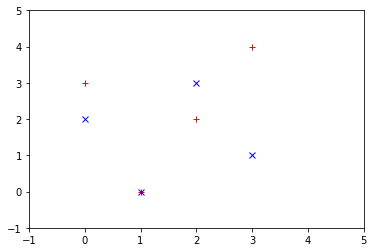

In [22]:
import matplotlib.pyplot as plt

def eval_point_gf(x, slope, y_int, m):
    """Evaluates the given x on the line specified in slope-intercept form, on GF(m)"""
    
    # STEP 1: Calculate the y value given x, slope, and y_int
    # Careful - m is NOT the slope!
    
    # HKN: replace this line with y = 0
    y = slope * x + y_int # TODO change this line
    
    # STEP 2: Convert this value into a valid value in the mod field
    
    # HKN: replace this line with y = y
    y = mod(y, m) # TODO call some function on y...
    
    return y
    
# The below function is already completed for you :)
def galois_field_demo(m_1, b_1, m_2, b_2, m):
    """Graph two lines given slope and y-intercept in GF(m)"""
    x_vals = [i for i in range(0, m-1)]
    y1_vals = [eval_point_gf(x, m_1, b_1, m) for x in x_vals]
    y2_vals = [eval_point_gf(x, m_2, b_2, m) for x in x_vals]
    plt.plot(x_vals, y1_vals, 'r+')
    plt.plot(x_vals, y2_vals, 'bx')
    plt.axis([-1, m, -1, m])
    plt.show()
    
galois_field_demo(2, 3, 3, 2, 5)